In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Any, List
import os
import matplotlib.pyplot as plt

In [2]:

import fathon
from fathon import fathonUtils as fu
from scipy.stats import norm


In [3]:

def makeReturns(pData):
    return pData.pct_change().fillna(0)

def AJjumpTest(pData, threshold_multiplier=2.0):
    r = abs(makeReturns(pData))
    std_dev = np.std(r)
    mean = np.mean(r)

    # Define 'jump' as a return that is threshold_multiplier times standard deviation away from the mean
    cvalue = mean + threshold_multiplier * std_dev

    jumps = r[r > cvalue].index
    probabilities = 1 - norm.cdf(r[r > cvalue], loc=mean, scale=std_dev)  # Assuming returns follow normal distribution

    result = dict(zip(jumps, probabilities))
    return result

# Test the function
np.random.seed(0)
s = pd.Series(np.random.randn(1000), name='value')

result = AJjumpTest(s)
print(result)


{97: 1.2212453270876722e-15, 362: 0.0, 438: 1.209143896119258e-12, 558: 0.0012737632605070992, 569: 0.0037810352561790106, 630: 0.0, 667: 0.020404950842174197, 689: 0.0012198620052531473, 747: 0.0010370527463524626, 755: 0.006415335814140888, 768: 6.8915631632471275e-06, 808: 0.0023036166042710304, 822: 0.00042938642236778346, 850: 0.00014980787677354446, 925: 0.012992158973919032, 967: 1.781024328018077e-09}


In [ ]:
result

## looking for jumps in reconstructed LOBs

In [4]:
import os
reconLOBs = '/media/ak/Data/InterestRateFuturesData/ReconstructedLOB'
symbols = os.listdir(reconLOBs)

In [5]:
symbolFolder = os.path.join( reconLOBs, symbols[5])
print(symbolFolder)

/media/ak/Data/InterestRateFuturesData/ReconstructedLOB/KE1


In [6]:
files = os.listdir(symbolFolder)

In [7]:
idx = 10
filePath = os.path.join(symbolFolder, files[idx])

In [8]:
dfLOB =pd.read_pickle(filePath)

In [9]:
microPrice = dfLOB.MicroPrice

In [10]:
s =makeReturns(microPrice)


In [11]:

result = AJjumpTest(microPrice)
print(result)


{478469: 3.05626336460918e-08, 567296: 0.015470457595111342, 568977: 0.0006360733728475454, 568910: 0.008851452809104599, 567213: 0.003219929340645078, 567299: 0.00487220926517018, 567300: 0.0032798181951255723, 568918: 0.00016711346886866263, 567234: 0.008486764989195428, 567301: 0.013127053854288473, 567239: 0.002506260259079407, 568989: 0.0020236499265703367, 568922: 0.002506260259079407, 567240: 0.0024627827680775427, 568994: 0.0035268289916943196, 569007: 0.003246821884848039, 568923: 0.0018886061008203114, 568939: 0.000700132056612679, 568940: 6.02158281015619e-08, 567268: 4.822649772862064e-07, 566679: 0.017727493675767758, 568941: 3.2577585074022863e-10, 565803: 2.6960322863089914e-11, 567553: 0.0031302917978427436, 565606: 0.0026833652623652338, 566794: 0.0023993547739766807, 568966: 2.6591395752006974e-11, 568967: 0.002233985120939308, 568422: 0.0012945281739970005, 568434: 0.00039476322865117375, 566814: 0.02054312289152105, 567737: 0.001333841493963983, 566869: 0.0004907340

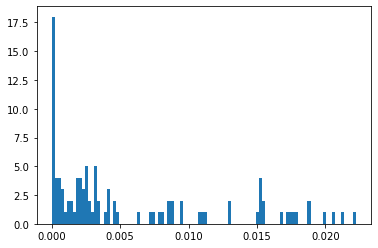

In [12]:
_=plt.hist(list(result.values()),bins = 100)

In [13]:
df_jumps = pd.DataFrame(list(result.items()), columns=['Tick', 'Prob'])
df_jumps['Prob'] = df_jumps['Prob'].apply(lambda x: '{:.2%}'.format(x))

In [14]:
import numpy as np
from scipy.stats import norm

def ait_sahalia_jacod_test(price_series, delta):
    """
    Function to perform the Ait-Sahalia and Jacod (2009) test for jumps.

    Parameters:
    price_series : array-like
        The price series to test.
    delta : float
        The bandwidth parameter.

    Returns:
    z_value : float
        The z-test value.
    critical_value : float
        The critical value under a 95% confidence level.
    p_value : float
        The p-value of the test.
    """

    # Calculate log returns
    log_returns = np.log(price_series).diff().dropna()

    # Calculate bipower variation
    bipower_variation = (np.pi / 2) * (log_returns.abs().rolling(window=2).sum().dropna())

    # Calculate the test statistic (Z-value here)
    z_value = (log_returns**2 - delta * bipower_variation) / np.sqrt((delta**2) * (2 * np.pi - delta) * (bipower_variation / delta))

    # Calculate the critical value for a 95% confidence level
    critical_value = norm.ppf(0.975)  # Two-tailed test, so we look at 0.975 percentile

    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(z_value.abs()))
    
    df_result = pd.DataFrame()
    df_result['z_value'] = z_value
    df_result['critical_value'] = critical_value
    df_result['p-value'] = p_value 


    return df_result

In [15]:
# Assume we have price data in a pandas DataFrame df
df = pd.DataFrame({
    'price': microPrice # Random data for demonstration
})

In [16]:
# Use the function on our price data
z_value, critical_value, p_value = ait_sahalia_jacod_test(df['price'], delta=0.1)

print(f"Z-value: {z_value}")
print(f"Critical value (95% confidence level): {critical_value}")
print(f"P-value: {p_value}")

Z-value: 95367          NaN
112350         NaN
112351   -0.000252
112352   -0.000959
112353   -0.000147
            ...   
569004   -0.000193
569005   -0.000619
569006   -0.000943
569007   -0.001428
569008   -0.000227
Name: price, Length: 4323, dtype: float64
Critical value (95% confidence level): 1.959963984540054
P-value: [       nan        nan 0.99979855 ... 0.99924753 0.99886037 0.99981862]


In [17]:
df_result = pd.DataFrame()
df_result['z_value'] = z_value
df_result['critical_value'] = critical_value
df_result['p-value'] = p_value 


In [18]:
df_result.describe()

,z_value,critical_value,p-value
count,4.204000e+03,4.323000e+03,4204.000000
mean,-4.443029e-04,1.959964e+00,0.999645
std,3.974657e-04,2.620429e-14,0.000317
min,-5.649577e-03,1.959964e+00,0.995492
25%,-6.849050e-04,1.959964e+00,0.999454
50%,-3.785843e-04,1.959964e+00,0.999698
75%,-8.762381e-05,1.959964e+00,0.999930
max,-4.750113e-09,1.959964e+00,1.000000


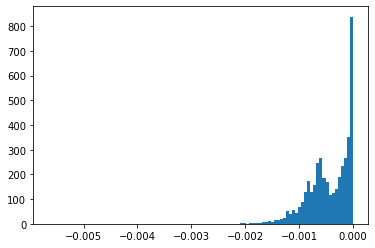

In [19]:
_=plt.hist(df_result.z_value, bins =100)

In [20]:
def autocovariance_microstructure_noise(Y, l, kn):
    """
    Function to estimate the autocovariance of market-microstructure noise.

    Parameters:
    Y : pandas Series
        The observed price series.
    l : int
        The lag.
    kn : int
        The tuning parameter.

    Returns:
    R_hat : float
        The estimated autocovariance.
    """

    n = len(Y)
    terms = [(Y.iloc[i+l] - Y.iloc[i+l+kn]) * (Y.iloc[i] - Y.iloc[i-2*kn]) for i in range(2*kn, n-kn-l)]
    R_hat = 1/n * sum(terms)

    return R_hat

In [21]:
# Assume we have price data in a pandas Series Y
Y = pd.Series(np.random.rand(1000))

# Choose a lag and a tuning parameter
l = 5
kn = 10

# Call the function
R_hat = autocovariance_microstructure_noise(Y, l, kn)

# Print the result
print(R_hat)

-0.0034387447611389454


##  playing with fathon and jumps

In [26]:
dfLOB.columns.values

array(['time', 'estimated_arrival_time', 'TradePrice', 'TradedVolume',
       'NoOfTrades', 'arrival_rate', 'AverageVolumePerTrade', 'date',
       'CCYTradedVolume', 'type', 'value', 'size', 'BestBid', 'BidSize',
       'BestAsk', 'AskSize', 'CumlTradingVolume', 'CCYCumlVolume',
       'CumlNoOfTrades', 'CumlTradedVolume', 'RunningNoOfTrades',
       'RunningCumlVolume', 'RunningCumlNoOfTrades', 'MicroPrice',
       'BASpread', 'QuoteSize', 'MidPrice', 'OrderImbalance',
       'ExpandingMeanRelativeTickVolume', 'MeanRelativeTickVolume'],
      dtype=object)

In [59]:
#time series
a = np.asarray(dfLOB.OrderImbalance.fillna(0))
b = np.asarray(dfLOB.ExpandingMeanRelativeTickVolume.fillna(0))


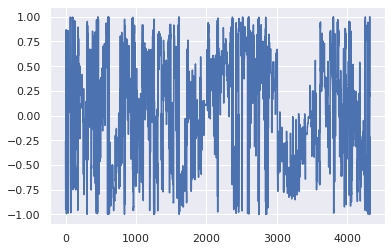

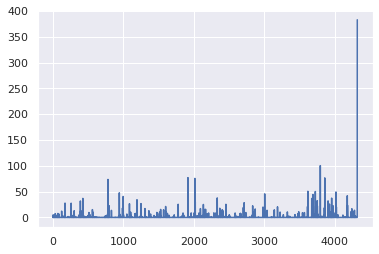

In [61]:
plt.plot(a)
plt.show()
plt.plot(b)

In [62]:


#zero-mean cumulative sum
a = fu.toAggregated(a)
b = fu.toAggregated(b)

#initialize mfdfa object
pymfdcca = fathon.MFDCCA(a, b)
#compute fluctuation function and generalized Hurst exponents
wins = fu.linRangeByStep(10, 2000)
n, F = pymfdcca.computeFlucVec(wins, np.arange(-3, 4, 0.1), revSeg=True, polOrd=1)
list_H, list_H_intercept = pymfdcca.fitFlucVec()

#compute mass exponents
tau = pymfdcca.computeMassExponents()

#compute multifractal spectrum
alpha, mfSpect = pymfdcca.computeMultifractalSpectrum()

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'f($\\alpha$)')

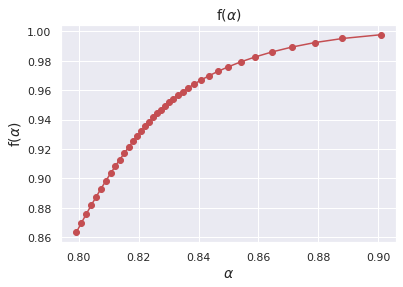

In [63]:
import matplotlib.pyplot as plt
plt.plot(alpha, mfSpect, 'ro-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.title('f($\\alpha$)', fontsize=14)

A concave shape in the f(q) vs q plot indicates a multifractal process. This suggests that there are many different scaling exponents in your time series,
meaning there are multiple types of variability or complexity in your data.

In [52]:
dfLOB.columns.values

array(['time', 'estimated_arrival_time', 'TradePrice', 'TradedVolume',
       'NoOfTrades', 'arrival_rate', 'AverageVolumePerTrade', 'date',
       'CCYTradedVolume', 'type', 'value', 'size', 'BestBid', 'BidSize',
       'BestAsk', 'AskSize', 'CumlTradingVolume', 'CCYCumlVolume',
       'CumlNoOfTrades', 'CumlTradedVolume', 'RunningNoOfTrades',
       'RunningCumlVolume', 'RunningCumlNoOfTrades', 'MicroPrice',
       'BASpread', 'QuoteSize', 'MidPrice', 'OrderImbalance',
       'ExpandingMeanRelativeTickVolume', 'MeanRelativeTickVolume'],
      dtype=object)

In [54]:
import numpy as np
from scipy.stats import spearmanr

# calculate volatility (standard deviation of returns)

# volatility = dfLOB.MicroPrice.pct_change.rolling(window=30).std()  # 30-day rolling volatility

# # perform MFDCCA
# result = perform_MFDCCA(series)

# calculate correlation
correlation, _ = spearmanr(mfSpect, dfLOB.OrderImbalance)
print('Spearman correlation: %.3f' % correlation)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 69 and the array at index 1 has size 4324